In [2]:
import pandas as pd


flights_path = '/home/eduardo/Documents/Projetos/AED2324_PRJ2_G19/dataset/flights.csv'
airports_path = '/home/eduardo/Documents/Projetos/AED2324_PRJ2_G19/dataset/airports.csv'
df_flights = pd.read_csv(flights_path)
df_airports = pd.read_csv(airports_path)

In [4]:
df_filter = df_flights[df_flights['Source'] == 'YBC']

df_merged = pd.merge(df_filter, df_airports[['Code','Country']], left_on='Target', right_on='Code', how='left')
df_merged = df_merged[['Source','Target','Country']]

print(df_merged.head())

qtd_distinct = df_merged.nunique().iloc[2] # Country column

print("Number of distinct airports target:", qtd_distinct)

Empty DataFrame
Columns: [Source, Target, Country]
Index: []
Number of distinct airports target: 0


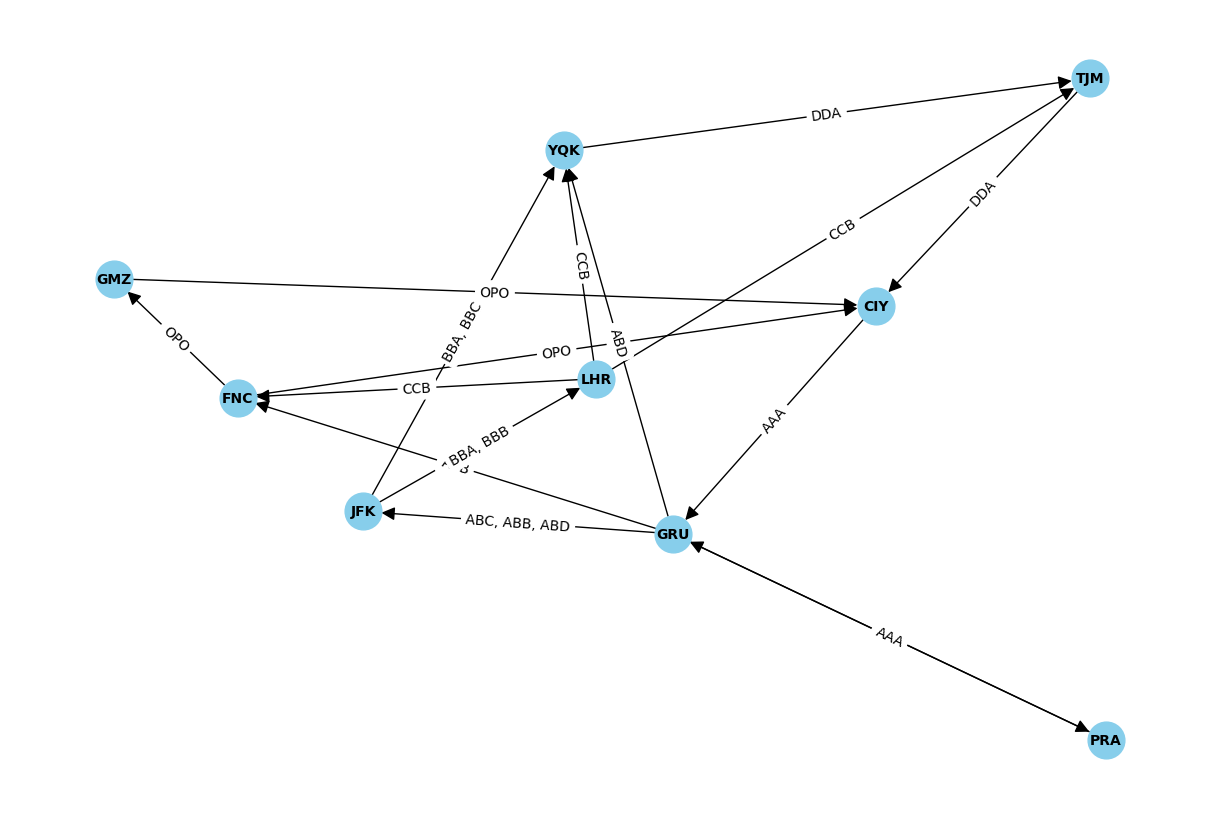

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

vertices_df = pd.read_csv("/home/eduardo/Documents/Projetos/AED2324_PRJ2_G19/dataset/airports.csv")
edges_df = pd.read_csv("/home/eduardo/Documents/Projetos/AED2324_PRJ2_G19/dataset/flights.csv")

G = nx.DiGraph()

for _, vertex in vertices_df.iterrows():
    G.add_node(vertex['Code'], label=vertex['Code'])

for _, edge in edges_df.iterrows():
    source = edge['Source']
    target = edge['Target']
    airline = edge['Airline']

    if G.has_edge(source, target):
        G[source][target]['airlines'].add(airline)
    else:
        G.add_edge(source, target, airlines={airline})

pos = nx.spring_layout(G)  
edge_labels = {(source, target): ', '.join(airlines) for source, target, airlines in G.edges(data='airlines')}

plt.figure(figsize=(12, 8))

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()